<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means II by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [27]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import random

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

from sklearn import datasets
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

### 1. Import the data

In [2]:
csv_file = 'ais.csv'
ais = pd.read_csv(csv_file)
ais

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,m,W_Polo
198,199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,m,Tennis
199,200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,m,Tennis
200,201,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.00,178.4,71.1,m,Tennis


### 2. Do some EDA of relationships between features.

In [3]:
ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  202 non-null    int64  
 1   rcc         202 non-null    float64
 2   wcc         202 non-null    float64
 3   hc          202 non-null    float64
 4   hg          202 non-null    float64
 5   ferr        202 non-null    int64  
 6   bmi         202 non-null    float64
 7   ssf         202 non-null    float64
 8   pcBfat      202 non-null    float64
 9   lbm         202 non-null    float64
 10  ht          202 non-null    float64
 11  wt          202 non-null    float64
 12  sex         202 non-null    object 
 13  sport       202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB


In [4]:
ais.set_index('Unnamed: 0',inplace = True)

In [5]:
ais

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
Unnamed: 0,,,,,,,,,,,,,
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,m,W_Polo
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,m,Tennis
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,m,Tennis


In [6]:
ais.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            193, 194, 195, 196, 197, 198, 199, 200, 201, 202],
           dtype='int64', name='Unnamed: 0', length=202)

In [7]:
ais.describe()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108911,43.091584,14.566337,76.876238,22.955891,69.021782,13.507426,64.873713,180.103960,75.007921
std,0.457976,1.800337,3.662989,1.362451,47.501239,2.863933,32.565333,6.189826,13.070197,9.734494,13.925199
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,5.630000,34.360000,148.900000,37.800000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,8.545000,54.667500,174.000000,66.525000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,11.650000,63.035000,179.700000,74.400000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,18.080000,74.750000,186.175000,84.125000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,35.520000,106.000000,209.400000,123.200000


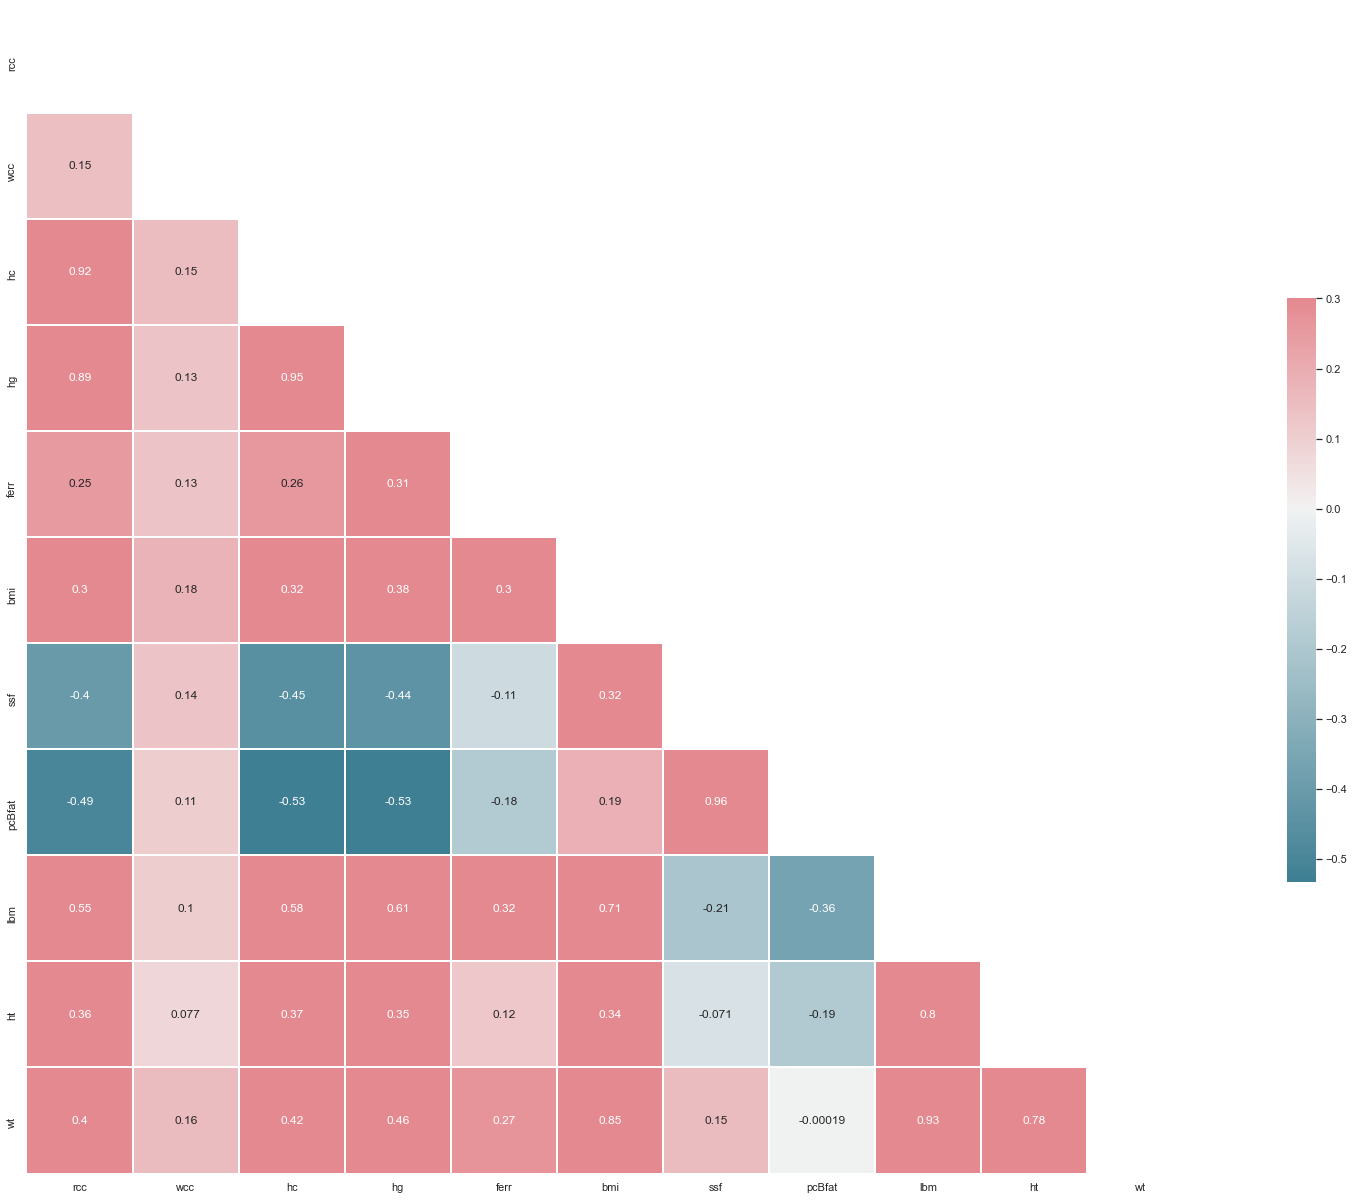

In [8]:
correlation_matrix = ais.corr()

# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [9]:
# ANSWER

ais_new = ais.drop(['sex','sport'], axis=1)
ais_new

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
Unnamed: 0,,,,,,,,,,,
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6
...,...,...,...,...,...,...,...,...,...,...,...
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(ais_new)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [18]:
# ANSWER

# 2 Clusters

from sklearn.cluster import KMeans

k = 2
# 2 Clusters
k_mean2 = KMeans(n_clusters=k)
k_mean2.fit(X)


KMeans(n_clusters=2)

### 5. Get the Labels of each point 

In [20]:
# Labels for 2 Clusters
labels_2 = k_mean2.labels_
print(labels_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
k_mean2.cluster_centers_

array([[-0.72128729, -0.11632817, -0.73772567, -0.75885194, -0.40955673,
        -0.43099832,  0.47515455,  0.62984587, -0.79856332, -0.58143622,
        -0.61565853],
       [ 0.70714441,  0.11404723,  0.72326046,  0.74397249,  0.4015262 ,
         0.42254737, -0.4658378 , -0.61749595,  0.78290521,  0.57003551,
         0.60358679]])

In [22]:
k_mean2.n_iter_

7

In [23]:
k_mean2.inertia_

1432.8802984104345

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the `inertia` attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [24]:
# ANSWER
Sum_of_squared_distances = []
K = range(1,15)

for i in K:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(ais_new)
    d = kmeans.inertia_
    Sum_of_squared_distances.append(d)

print(Sum_of_squared_distances)



[772163.8116782176, 461735.41499036556, 326376.1578621592, 246158.4198529274, 216183.73879947714, 192396.77699529816, 170365.69356819737, 153966.1473114086, 141785.17445436263, 131439.34278022638, 121777.48637111629, 112862.25966359783, 106938.34960647716, 99880.71091372828]


Plot the sum of squared distances vs. k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

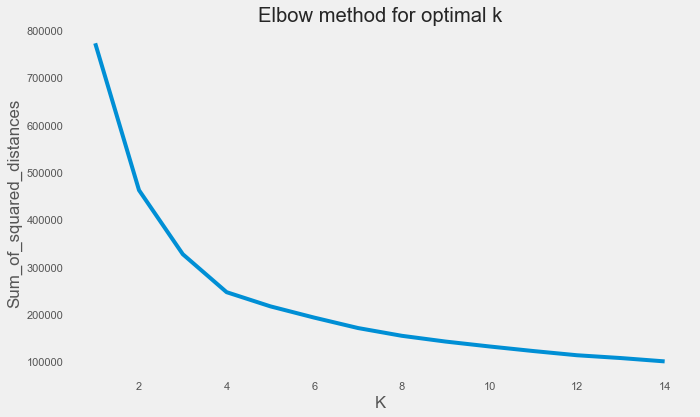

In [28]:
# ANSWER

plt.figure(figsize=(10,6))
plt.plot(K,Sum_of_squared_distances)
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.grid()
plt.show()

### 7. Plot `pcBfat` vs. `wt` using the clusters from each model.

- Plot pcBfat, wt using hue = sex
- Plot pcBfat, wt using hue = labels indentified by the model


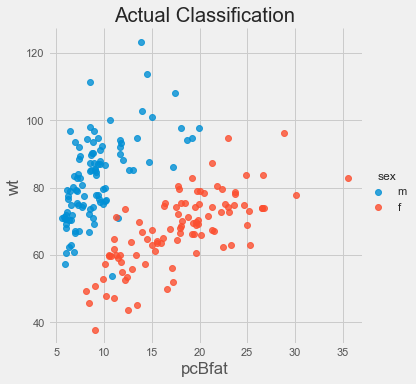

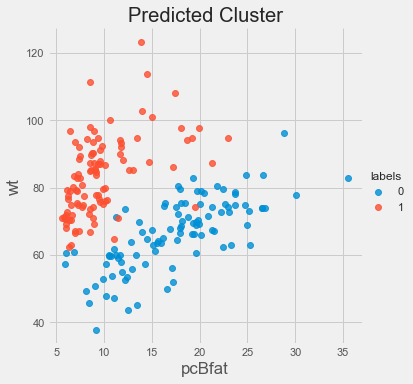

In [33]:
# ANSWER
ais_labels = ais
ais_labels['labels'] = labels_2

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex', 
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();

Repeat for k = 4

In [34]:
# ANSWER

# 4 Clusters

K = 4
kmeans_model = KMeans(n_clusters=K).fit(X)


In [35]:
# Labels for 2 Clusters
labels_4 = kmeans_model.labels_
print(labels_4)

[3 3 3 3 0 0 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3 3 0 3 0 3 3 0 3 3 3 3 3 3 0 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 0 3 0 0 3 3 0 0 0 0 0 0 1 3 3 3 3 1
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 2 1
 1 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 1 1 0 1 1 1 2 2 1 1
 1 1 1 1 0 1 0 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 2 2 2 2
 2 2 1 2 2 1 2 1 2 2 2 1 2 1 1 1 1]


In [36]:
kmeans_model.cluster_centers_

array([[-0.54991204, -0.21074743, -0.51471271, -0.59105878, -0.38001976,
        -1.02173718, -0.40306825, -0.16256092, -1.08378937, -1.04456283,
        -1.2183081 ],
       [ 0.80524151, -0.20707109,  0.79191879,  0.78236526,  0.07569564,
        -0.17772918, -0.7965456 , -0.90666119,  0.31283598,  0.26048164,
        -0.0087025 ],
       [ 0.61593842,  0.50092551,  0.6655389 ,  0.71359833,  0.7453067 ,
         1.07940548, -0.12236477, -0.32525411,  1.33313703,  0.94900495,
         1.30077606],
       [-0.8570217 , -0.04849597, -0.91576651, -0.88360258, -0.39338309,
         0.10664052,  1.22374084,  1.30408091, -0.53993222, -0.19307911,
        -0.0840794 ]])

In [37]:
kmeans_model.n_iter_

9

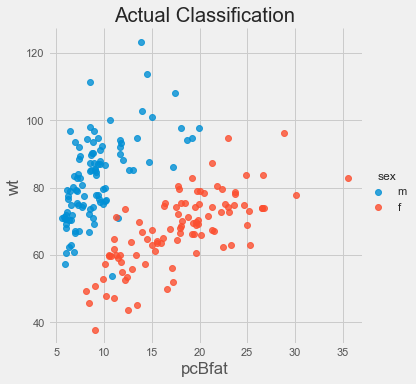

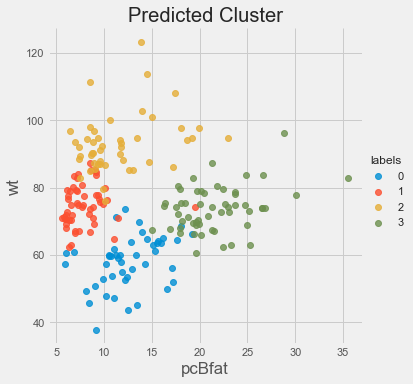

In [38]:
ais_labels = ais
ais_labels['labels'] = labels_4

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex', 
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



